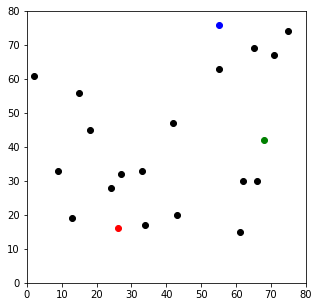

In [0]:
# Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'x':[15, 21, 34, 43, 27, 9, 24, 2, 13, 61, 75, 42, 18, 33, 55, 62, 66, 65, 71],
    'y':[56, 82, 17, 20, 32, 33, 28, 61, 19, 15, 74, 47, 45, 33, 63, 30, 30, 69, 67]
})

np.random.seed(200)
k = 3
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  15  56        41.484937        54.817880        44.721360        1     r
1  21  82        66.189123        61.717096        34.525353        3     b
2  34  17         8.062258        42.201896        62.625873        1     r
3  43  20        17.464249        33.301652        57.271284        1     r
4  27  32        16.031220        42.201896        52.153619        1     r


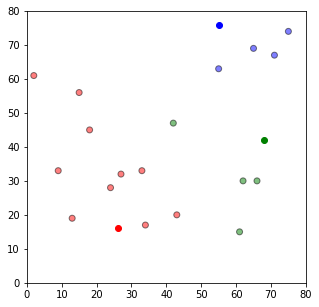

In [0]:
# Assignment
def assignment(df, centroid):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroid.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

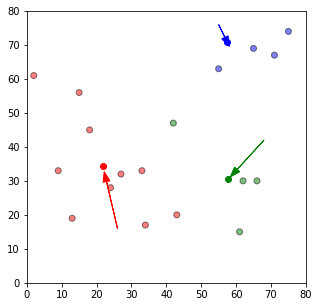

In [0]:
# Update Stage
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

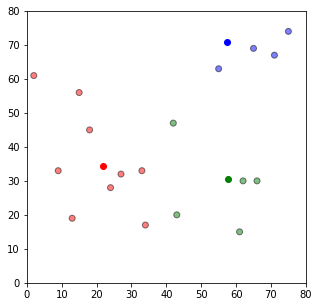

In [0]:
# Repeat Assignment Stage
df = assignment(df, centroids)

#Plot result
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

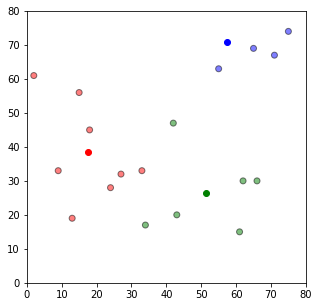

In [0]:
#Continue until all assigned categories don't change anymore
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()